### Instructions
In this notebook, you we will build, compile and fit a neural network model to the Iris dataset. You will also implement validation, regularisation and callbacks to improve your model.
Some code cells are provided you in the notebook. You should avoid editing provided code, and make sure to execute the cells in order to avoid unexpected errors. Some cells begin with the line:

In [19]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline

# If you would like to make further imports from tensorflow, add them here



#### The Iris dataset

In this file, you will use the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). It consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For a reference, see the following papers:

- R. A. Fisher. "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188, 1936.

Your goal is to construct a neural network that classifies each sample into the correct class, as well as applying validation and regularisation techniques.

In [20]:
from sklearn.model_selection import train_test_split

def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset as loaded by sklearn.datasets.load_iris(), and then 
    splits so that the training set includes 90% of the full dataset, with the test set 
    making up the remaining 10%.
    Your function should return a tuple (train_data, test_data, train_targets, test_targets) 
    of appropriately split training and test data and targets.
    """
    
    # Extracting features (data) and target labels
    data = iris_data.data
    targets = iris_data.target
    
    # Split the dataset into 90% training and 10% testing
    train_data, test_data, train_targets, test_targets = train_test_split(
        data, targets, test_size=0.1, random_state=42)
    
    # Return the split data and targets
    return train_data, test_data, train_targets, test_targets


In [21]:
# Run my function to generate the test and training data.

iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [22]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import he_uniform
from tensorflow.keras.initializers import Ones

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    
    model = Sequential()
    
    # First layer: Dense with 64 units, He uniform initializer for weights and bias initialised to 1
    model.add(Dense(64, input_shape=input_shape, activation='relu', 
                    kernel_initializer=he_uniform(), bias_initializer=Ones()))
    
    # Four Dense layers with 128 units and ReLU activation
    for _ in range(4):
        model.add(Dense(128, activation='relu'))
    
    # Four Dense layers with 64 units and ReLU activation
    for _ in range(4):
        model.add(Dense(64, activation='relu'))
    
    # Output layer: Dense with 3 units (for classification into 3 classes) and softmax activation
    model.add(Dense(3, activation='softmax'))
    
    return model


In [24]:
# Run your function to get the model

model = get_model(train_data[0].shape)

In [25]:
from tensorflow.keras.optimizers import Adam

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    
    # Create the Adam optimizer with learning rate 0.0001
    optimizer = Adam(learning_rate=0.0001)
    
    # Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
# Run your function to compile the model

compile_model(model)

In [27]:
def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    
    # Train the model with the given parameters
    history = model.fit(
        train_data, 
        train_targets, 
        epochs=epochs, 
        batch_size=40, 
        validation_split=0.15,  # Use 15% of the data as the validation set
        verbose=2 # Display progress during training
    )
    
    # Return the history object containing metrics
    return history


In [28]:
# Run your function to train the model

history = train_model(model, train_data, train_targets, epochs=800 )

Epoch 1/800
3/3 - 2s - 582ms/step - accuracy: 0.3246 - loss: 1.1292 - val_accuracy: 0.4762 - val_loss: 1.0407
Epoch 2/800
3/3 - 0s - 21ms/step - accuracy: 0.3246 - loss: 1.0900 - val_accuracy: 0.4762 - val_loss: 1.0153
Epoch 3/800
3/3 - 0s - 25ms/step - accuracy: 0.3246 - loss: 1.0639 - val_accuracy: 0.4762 - val_loss: 0.9948
Epoch 4/800
3/3 - 0s - 23ms/step - accuracy: 0.3246 - loss: 1.0422 - val_accuracy: 0.4762 - val_loss: 0.9808
Epoch 5/800
3/3 - 0s - 20ms/step - accuracy: 0.3246 - loss: 1.0233 - val_accuracy: 0.4762 - val_loss: 0.9652
Epoch 6/800
3/3 - 0s - 22ms/step - accuracy: 0.3246 - loss: 1.0083 - val_accuracy: 0.6190 - val_loss: 0.9498
Epoch 7/800
3/3 - 0s - 20ms/step - accuracy: 0.5439 - loss: 0.9909 - val_accuracy: 0.6667 - val_loss: 0.9321
Epoch 8/800
3/3 - 0s - 24ms/step - accuracy: 0.6754 - loss: 0.9712 - val_accuracy: 0.6667 - val_loss: 0.9126
Epoch 9/800
3/3 - 0s - 20ms/step - accuracy: 0.6754 - loss: 0.9514 - val_accuracy: 0.6667 - val_loss: 0.8943
Epoch 10/800
3/3 -

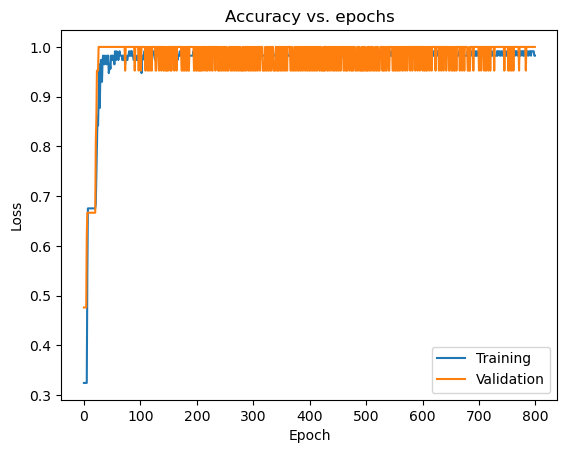

In [29]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

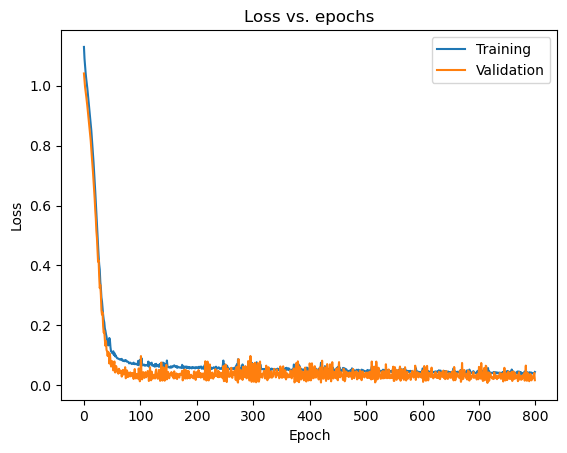

In [30]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import he_uniform
from tensorflow.keras.initializers import Ones

def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    Your function should return the model.
    """
    
    model = Sequential()
    
    # First Dense Layer with 64 units, He uniform initializer and L2 regularization
    model.add(Dense(64, input_shape=input_shape, activation='relu',
                    kernel_initializer=he_uniform(), bias_initializer=Ones(),
                    kernel_regularizer=l2(weight_decay)))
    
    # Four Dense Layers with 128 units, ReLU activation, and L2 regularization
    for _ in range(4):
        model.add(Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)))
    
    # Add Dropout layer after the 3rd Dense layer
    model.add(Dropout(dropout_rate))
    
    # Two more Dense layers with 128 units, ReLU activation, and L2 regularization
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)))
    
    # Add BatchNormalization layer
    model.add(BatchNormalization())
    
    # Two more Dense layers with 64 units, ReLU activation, and L2 regularization
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)))
    
    # Add Dropout layer after these Dense layers
    model.add(Dropout(dropout_rate))
    
    # Final Dense Layer with 3 units (softmax activation)
    model.add(Dense(3, activation='softmax'))
    
    return model


In [32]:
# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [33]:
# Compile the model

compile_model(reg_model)

In [34]:
# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 - 3s - 888ms/step - accuracy: 0.3596 - loss: 2.2977 - val_accuracy: 0.3810 - val_loss: 2.0734
Epoch 2/800
3/3 - 0s - 22ms/step - accuracy: 0.3246 - loss: 2.2147 - val_accuracy: 0.4762 - val_loss: 2.0614
Epoch 3/800
3/3 - 0s - 22ms/step - accuracy: 0.4211 - loss: 2.1422 - val_accuracy: 0.4762 - val_loss: 2.0487
Epoch 4/800
3/3 - 0s - 25ms/step - accuracy: 0.3246 - loss: 2.1615 - val_accuracy: 0.4762 - val_loss: 2.0348
Epoch 5/800
3/3 - 0s - 18ms/step - accuracy: 0.3509 - loss: 2.0823 - val_accuracy: 0.4762 - val_loss: 2.0262
Epoch 6/800
3/3 - 0s - 23ms/step - accuracy: 0.4298 - loss: 2.0400 - val_accuracy: 0.4762 - val_loss: 2.0194
Epoch 7/800
3/3 - 0s - 28ms/step - accuracy: 0.4474 - loss: 2.0117 - val_accuracy: 0.4762 - val_loss: 2.0137
Epoch 8/800
3/3 - 0s - 22ms/step - accuracy: 0.4211 - loss: 1.9874 - val_accuracy: 0.4762 - val_loss: 2.0051
Epoch 9/800
3/3 - 0s - 22ms/step - accuracy: 0.4912 - loss: 1.9482 - val_accuracy: 0.4762 - val_loss: 1.9952
Epoch 10/800
3/3 -

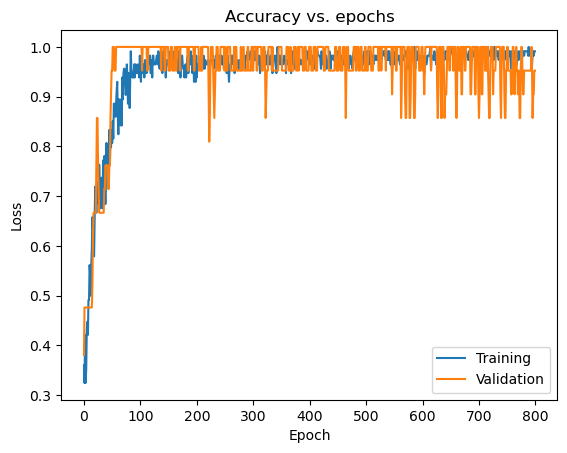

In [35]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

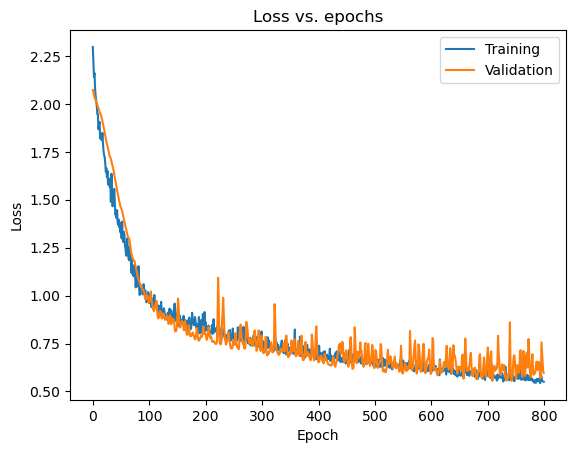

In [36]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

We can see that the regularisation has helped to reduce the overfitting of the network.
You will now incorporate callbacks into a new training run that implements early stopping and learning rate reduction on plateaux.



In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    
    # Create the EarlyStopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        mode='min',  # Stop when validation loss stops decreasing
        patience=30,  # Patience of 30 epochs
        restore_best_weights=True  # Restore best weights when training is stopped
    )
    
    # Create the ReduceLROnPlateau callback
    learning_rate_reduction = ReduceLROnPlateau(
        monitor='val_loss',  # Monitor validation loss
        factor=0.2,  # Reduce learning rate by a factor of 0.2
        patience=20,  # Patience of 20 epochs
        verbose=1,  # Print a message when learning rate is reduced
        min_lr=1e-6  # Minimum learning rate value to avoid decreasing too much
    )
    
    return early_stopping, learning_rate_reduction


In [38]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)


Epoch 160: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.


In [39]:
learning_rate_reduction.patience

20

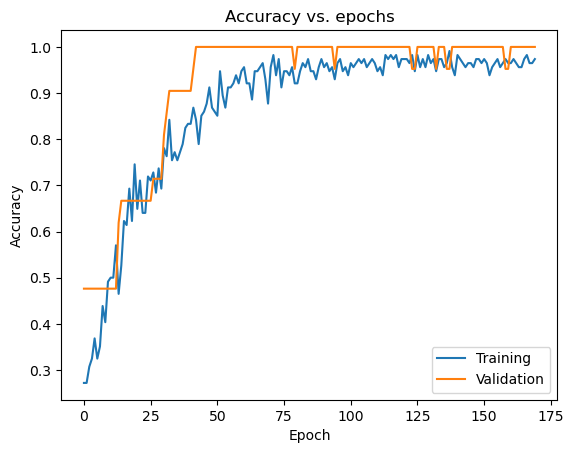

In [40]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

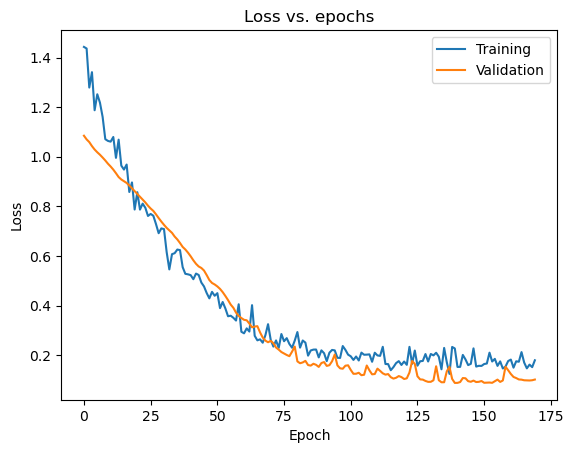

In [41]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [42]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.157
Test accuracy: 93.33%
